In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [11]:
df=pd.read_csv('Data file.csv')

In [ ]:
df.head()

Unnamed: 0  label       msisdn  ...  payback90  pcircle       pdate
0           1      0  21408I70789  ...  29.000000      UPW  2016-07-20
1           2      1  76462I70374  ...   0.000000      UPW  2016-08-10
2           3      1  17943I70372  ...   0.000000      UPW  2016-08-19
3           4      1  55773I70781  ...   0.000000      UPW  2016-06-06
4           5      1  03813I82730  ...   2.333333      UPW  2016-06-22

[5 rows x 37 columns]

In [ ]:
df.shape

(209593, 37)

Unnamed is an Index so it can droped 

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
pd.set_option('display.max_rows',None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

NO NULL value exist

In [ ]:
df.msisdn.value_counts().head()

04581I85330    7
47819I90840    7
55809I89238    6
43096I88688    6
29191I82738    6
Name: msisdn, dtype: int64

misisdn repersents mobile number of user and it is repeting itself which is odd but there might be good explanation for it hidden in the data

In [ ]:
df.loc[df.msisdn=='47819I90840']

label       msisdn    aon  ...  payback90  pcircle       pdate
12750       1  47819I90840  893.0  ...   2.020833      UPW  2016-08-03
25011       1  47819I90840  900.0  ...   2.098039      UPW  2016-08-10
68194       1  47819I90840  841.0  ...   1.714286      UPW  2016-07-01
105946      1  47819I90840  813.0  ...   2.000000      UPW  2016-06-17
123964      1  47819I90840  879.0  ...   2.000000      UPW  2016-07-22
162172      1  47819I90840  881.0  ...   2.076923      UPW  2016-07-26
184447      1  47819I90840  889.0  ...   2.000000      UPW  2016-07-31

[7 rows x 36 columns]

 'I' has been used to mask the middle digit of  orignal mobile number which leads to repiting of mobile number(msisdn)

The dataset have over 200000 data which might become deficult to analize the feature so it is wise to reduce the dataset for analisis.

In [14]:
df.drop('msisdn',axis=1,inplace=True)

In [15]:
df1=df.sample(n=50000, random_state=1)

In [16]:
cat=[]
num=[]
for i in df1.columns:
  if df1[i].nunique()<10:
    cat.append(i)
  else:
    num.append(i)
df=pd.concat([df[num],pd.get_dummies(df[cat], drop_first=False)],axis=1)
df1=pd.concat([df1[num],pd.get_dummies(df1[cat], drop_first=False)],axis=1)

cat=[]
num=[]
for i in df1.columns:
  if df1[i].nunique()<10:
    cat.append(i)
  else:
    num.append(i)

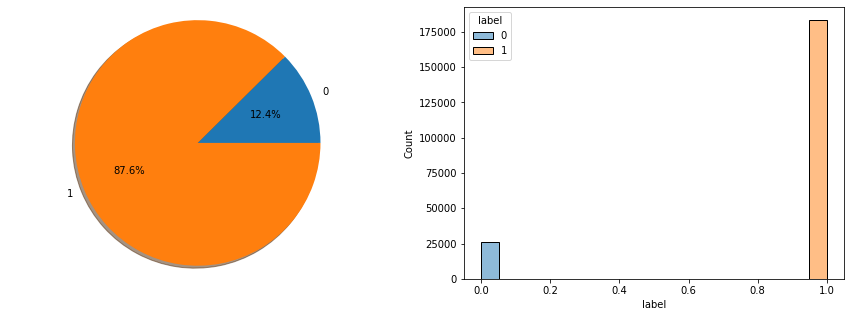

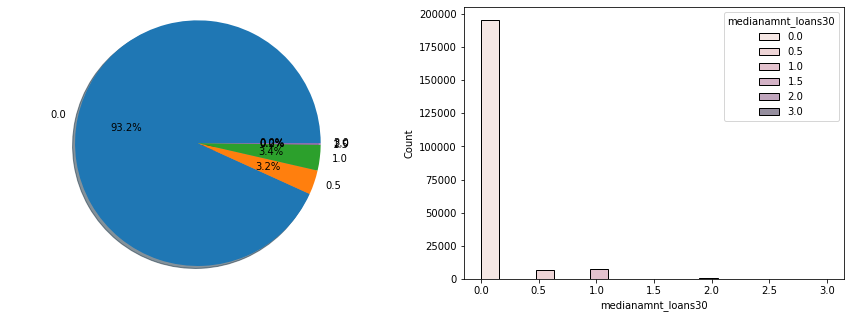

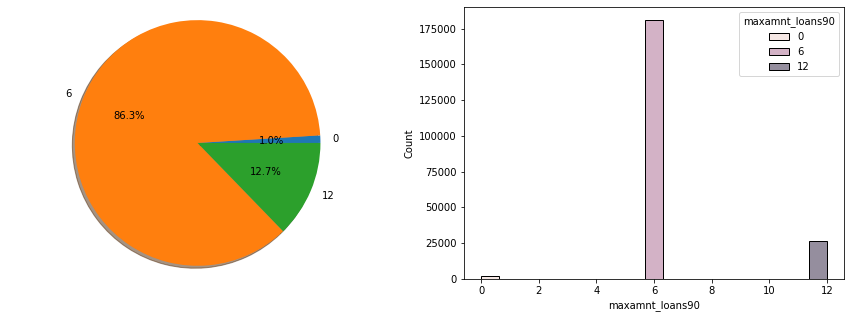

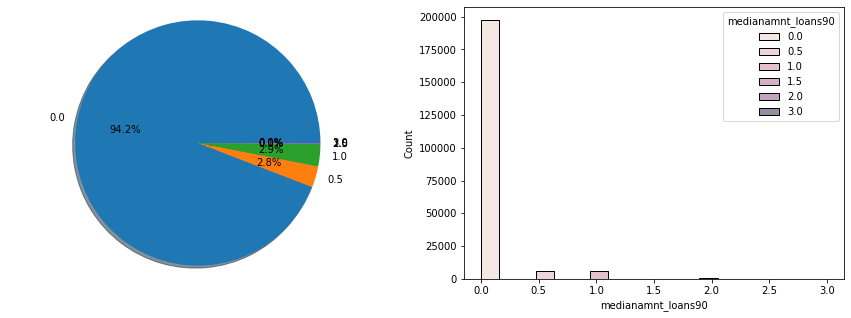

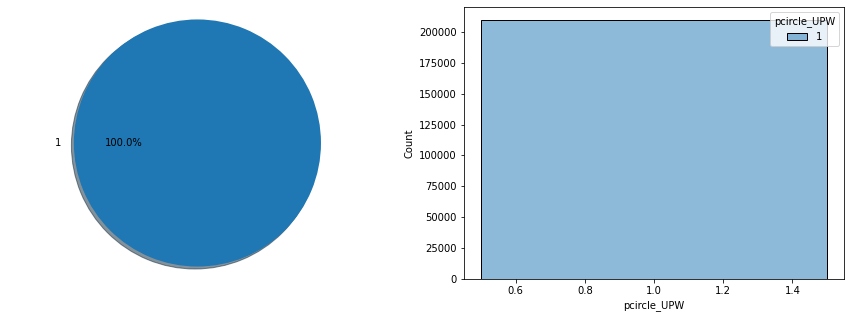

In [ ]:

for i in cat:
  labels = df1[i].astype('category').cat.categories.tolist()
  counts = df1[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.histplot(x=i,data=df,ax=ax2,hue=i)
  plt.show()

1-This dataset is highly unbalanced it is clear by lable distibution. It will be handeled during Prediction

2- medianamnt_loans90 and medianamnt_loans30 clearly sowes  that 5-7 persent of population are frequently taking loan

3-Maximum population are taking loan of 6

4- All the data belongs to same Circle i.e-UPW. solution is to drop pcircle

In [17]:
df1.drop(['pcircle_UPW','pdate'],axis=1,inplace=True)
df.drop(['pcircle_UPW','pdate'],axis=1,inplace=True)
cat.remove('pcircle_UPW')

fitures are highly right skewed so using log,boxcox... transformation will help normalize the featue



In [30]:
x=df.drop('label',axis=1)
y=df.label

In [ ]:
x.skew().abs()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
payback30                8.310695
payback90                6.899951
medianamnt_loa

In [9]:
df1.plot(kind='density',subplots=True,layout=(5,7),sharex=False,legend=True,fontsize=1,figsize=(20,20))

NameError: ignored

In [18]:
import scipy.stats as stat
import pylab 

In [19]:

def best_skew(dummy_data):
  df2=pd.DataFrame()
  df3=pd.DataFrame()
  for i in dummy_data.columns:
    if dummy_data[i].min()<0:
      dummy_data[i]=dummy_data[i]-dummy_data[i].min()+1

    alpha=np.abs(dummy_data[i].skew())
    beta=i

    df2[i+'_log']=np.log(dummy_data[i])
    if alpha>np.abs(df2[i+'_log'].skew()):
      alpha=np.abs(df2[i+'_log'].skew())
      beta=(i+'_log')
  

    df2[i+'_Boxcox'],para=stat.boxcox(dummy_data[i]+1)
    if alpha>np.abs(df2[i+'_Boxcox'].skew()):
      alpha=np.abs(df2[i+'_Boxcox'].skew())
      beta=(i+'_Boxcox')
  

    df2[i+'_sqrt']= dummy_data[i]**(1/2)
    if alpha>np.abs(df2[i+'_sqrt'].skew()):
      alpha=np.abs(df2[i+'_sqrt'].skew())
      beta=(i+'_sqrt')
  

    df2[i+'_exponential']= dummy_data[i]**(1/1.2)
    if alpha>np.abs(df2[i+'_exponential'].skew()):
      alpha=np.abs(df2[i+'_exponential'].skew())
      beta=(i+'_exponential')
  

    df2[i+'_reciprocal']= 1/dummy_data[i]
    if alpha>np.abs(df2[i+'_reciprocal'].skew()):
      alpha=np.abs(df2[i+'_reciprocal'].skew())
      beta=(i+'_reciprocal')
    

    df3[i]=df2[beta]
    

    
  return(df3)
 

In [20]:
def z_outlier1(df,a):
  z=np.abs(stat.zscore(df[a]))
  print(str(df.loc[df.label==0].size)+' is size of label= 0')
  print(str(df.loc[df.label==1].size)+' is size of label= 1')
  a=int(df.size)
  print(df.shape)
  df_z = df.loc[z<3]
  print(str(df_z.loc[df_z.label==0].size)+' is size of label= 0')
  print(str(df_z.loc[df_z.label==1].size)+' is size of label= 1')
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  return (df_z)


  


In [21]:
def remove_outlier_IQR(df,a):
    print('old size ' + str(df.size))
    b=int(df.size)
    Q1=df[a].quantile(0.25)
    Q3=df[a].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[a]<(Q1-1.5*IQR)) | (df[a]>(Q3+1.5*IQR)))]
    print('old size ' + str(df_final.size) )
    print('Data retained = '+str(int(df_final.size)/b))
    return df_final


In [22]:
def z_outlier(a):
  z=np.abs(stat.zscore(a))
  df_z=a
  print(str(df_z.loc[df_z.label==0].size)+' is size of label= 0')
  print(str(df_z.loc[df_z.label==1].size)+' is size of label= 1')
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print(str(df_z.loc[df_z.label==0].size)+' is size of label= 0')
  print(str(df_z.loc[df_z.label==1].size)+' is size of label= 1')
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  return(df_z)

In [23]:
def pplot(df,feature):
  
 plt.subplot(1,2,1)
 plt.hist(df[feature])
 plt.xlabel(i)
 plt.subplot(1,2,2)
 print(df[feature].skew())
 stat.probplot(df[feature],dist='norm',plot=pylab)
 plt.show()

In [24]:

def com_outlier(df,i):
  pplot(x,i)
  dummy=remove_outlier_IQR(df,i)
  print('IQR')
  pplot(dummy,i)
  dummy1=z_outlier1(df,i)
  print('Z_score')
  pplot(dummy1,i)

In [25]:
num.remove('pdate')

In [26]:
for i in x[num].columns:
  com_outlier(df,i) 

  


NameError: ignored

In [27]:
df_o = z_outlier(df)

863346 is size of label= 0
6053223 is size of label= 1
739200 is size of label= 0
4589145 is size of label= 1
Percent of data retained = 0.7703740105824145


In [28]:
(df.shape[0]-df_o.shape[0])/df.shape[0]

0.22962598941758552

aon                        AxesSubplot(0.125,0.749828;0.0945122x0.130172)
daily_decr30            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
daily_decr90            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
rental30                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
rental90                AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
last_rech_date_ma       AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
last_rech_date_da       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
last_rech_amt_ma           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
cnt_ma_rech30           AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
fr_ma_rech30            AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
medianmarechprebal30    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
cnt_ma_rech90           AxesSubplot(0.

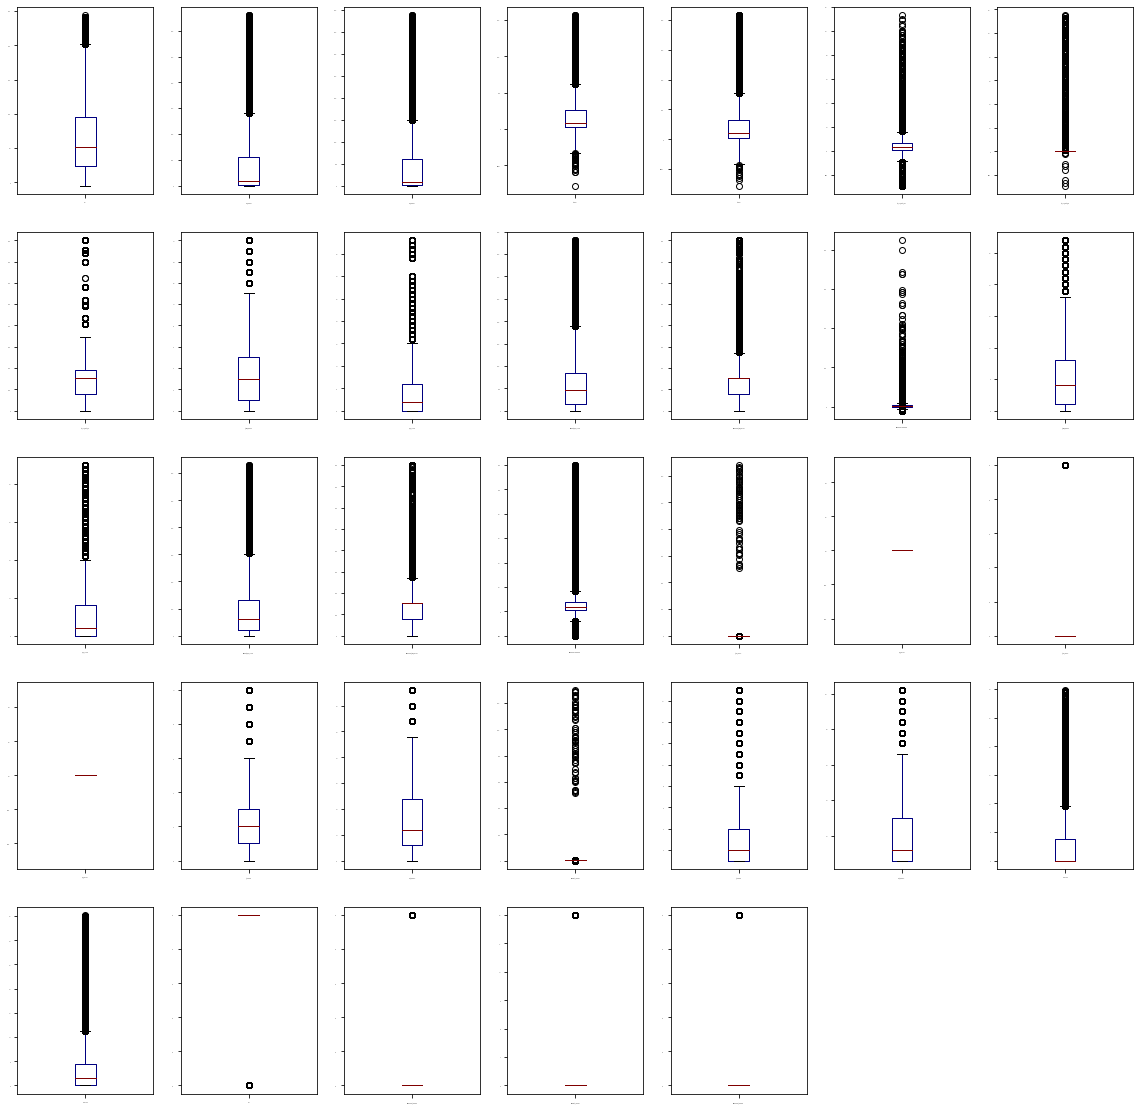

In [ ]:
df_o.plot(kind='box',subplots=True,layout=(5,7),sharex=False,legend=True,fontsize=1,figsize=(20,20),colormap=mpl.cm.jet)

In [ ]:
df_o_num=df_o[num]

In [ ]:
df_o_num.drop([x.columns[19],x.columns[21]],axis = 1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
from sklearn.preprocessing import StandardScaler as ss
x_num_ss=ss().fit_transform(x[num])

In [34]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in x[num].columns:
 pt1=(x[i]-x[i].min()+0.0001)
 pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3128: FutureWarning: The default value of 'method' will change from 'box-cox' to 'yeo-johnson' in version 0.23. Set the 'method' argument explicitly to silence this warning in the meantime.
  FutureWarning)


In [ ]:

from sklearn.preprocessing import power_transform as PT
for i in range(0,29):
 pt1=(x_num_ss[i]-np.min(x_num_ss[i])+0.0001)
 pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(x[num])


In [44]:
pt1=pd.DataFrame(pt1)

In [45]:
pt1.columns=x[num].columns

In [46]:

pt1.skew()

aon                     -0.125757
daily_decr30             0.024042
daily_decr90             0.032055
rental30                 0.839991
rental90                 0.632817
last_rech_date_ma       -1.751084
last_rech_date_da      -33.316819
last_rech_amt_ma        -0.660744
cnt_ma_rech30           -0.506423
fr_ma_rech30            -0.057449
sumamnt_ma_rech30       -0.811142
medianamnt_ma_rech30    -0.876157
medianmarechprebal30    -3.210409
cnt_ma_rech90           -0.344863
fr_ma_rech90            -0.389656
sumamnt_ma_rech90       -0.629876
medianamnt_ma_rech90    -0.685857
medianmarechprebal90     0.505236
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.245347
amnt_loans30             0.240905
maxamnt_loans30          1.662013
cnt_loans90              0.675081
amnt_loans90             0.250063
payback30                0.066319
payback90               -0.109707
dtype: float64

In [49]:
pt1=pd.concat([pt1,df[cat]],axis=1)

cheaking for Outlires 

aon                        AxesSubplot(0.125,0.749828;0.0945122x0.130172)
daily_decr30            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
daily_decr90            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
rental30                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
rental90                AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
last_rech_date_ma       AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
last_rech_date_da       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
last_rech_amt_ma           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
cnt_ma_rech30           AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
fr_ma_rech30            AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
sumamnt_ma_rech30       AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
medianmarechprebal30    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
cnt_ma_rech90           AxesSubplot(0.

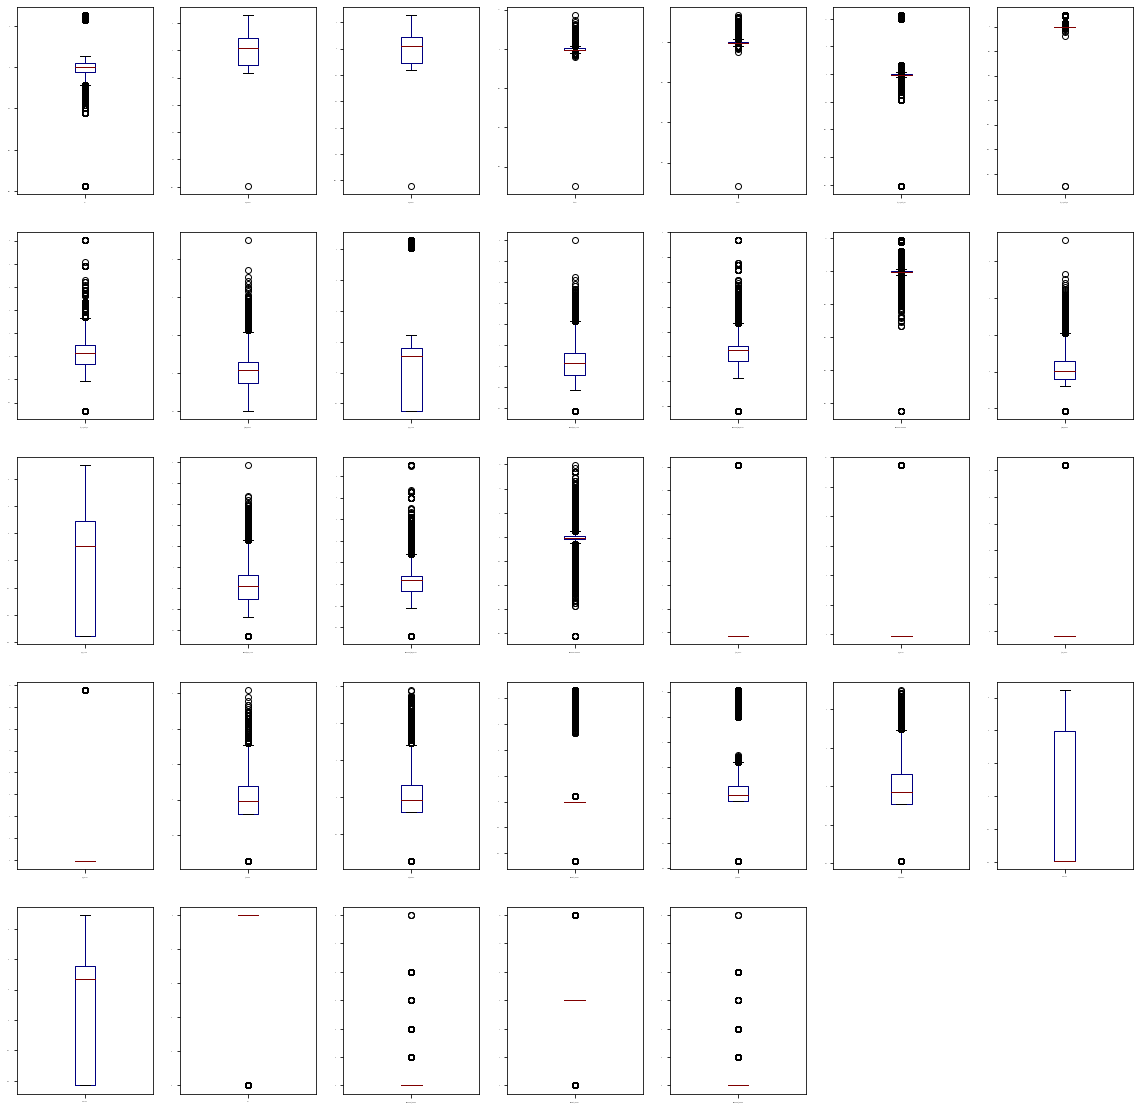

In [50]:
pt1.plot(kind='box',subplots=True,layout=(5,7),sharex=False,legend=True,fontsize=1,figsize=(20,20),colormap=mpl.cm.jet)

This boxplot proviedes us with the information that some of the features is catagorical in nature but it need further analysis 

According to above analysis it is clear that distribution has impooved but huge amunt of outlier is still present which will be dealt after finding corilation  

In [54]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(pt1.drop('label',axis=1),y,test_size=0.3,random_state=102)

In [55]:
def z_outlier(a,b):
  z=np.abs(stat.zscore(a))
  df_z=pd.concat([a,b],axis=1)
  print(str(df_z.loc[df_z.label==0].size)+' is size of label= 0')
  print(str(df_z.loc[df_z.label==1].size)+' is size of label= 1')
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print(str(df_z.loc[df_z.label==0].size)+' is size of label= 0')
  print(str(df_z.loc[df_z.label==1].size)+' is size of label= 1')
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('label',axis=1)
  y_z=df_z.label
  return(x_z,y_z)

In [56]:
x_train,y_train=z_outlier(x_train,y_train)


601260 is size of label= 0
4240335 is size of label= 1
525789 is size of label= 0
3454176 is size of label= 1
Percent of data retained = 0.8220359199809154


In [57]:
import lightgbm as LGB
lgb = LGB.LGBMClassifier().fit(x_train,y_train)

y_pred=lgb.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3474  4468]
 [ 1052 53884]]
0.9122109481853748
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.85      0.71      0.75     62878
weighted avg       0.90      0.91      0.90     62878



In [58]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knc=KNC().fit(x_train,y_train)

y_pred=knc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 3188  4754]
 [ 2249 52687]]
0.8886255924170616
              precision    recall  f1-score   support

           0       0.59      0.40      0.48      7942
           1       0.92      0.96      0.94     54936

    accuracy                           0.89     62878
   macro avg       0.75      0.68      0.71     62878
weighted avg       0.88      0.89      0.88     62878



In [59]:
from xgboost import XGBClassifier as XGC
xgc=XGC().fit(x_train,y_train)

y_pred=xgc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2788  5154]
 [  701 54235]]
0.9068831705843061
              precision    recall  f1-score   support

           0       0.80      0.35      0.49      7942
           1       0.91      0.99      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.86      0.67      0.72     62878
weighted avg       0.90      0.91      0.89     62878



In [60]:
from sklearn.ensemble import AdaBoostClassifier as ABC
abc=ABC().fit(x_train,y_train)

y_pred=abc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2451  5491]
 [  673 54263]]
0.9019688921403353
              precision    recall  f1-score   support

           0       0.78      0.31      0.44      7942
           1       0.91      0.99      0.95     54936

    accuracy                           0.90     62878
   macro avg       0.85      0.65      0.69     62878
weighted avg       0.89      0.90      0.88     62878



In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC().fit(x_train,y_train)

y_pred=rfc.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3545  4397]
 [ 1187 53749]]
0.9111931041063647
              precision    recall  f1-score   support

           0       0.75      0.45      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878



In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RFC()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='f1_micro')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

In [ ]:
'boosting_type' : ['gbdt','dart','goss'] 

num_leaves : [30,40,50,60,70,80,90] 

max_depth : [int(x) for x in np.linspace(-1, 110, num = 12)]

n_estimators : [100,200,300,500,700]

class_weight (dict, 'balanced' or None, optional (default=None)) – Weights associated with classes in the form {class_label: weight}. Use this parameter only for multi-class classification task; for binary classification task you may use is_unbalance or scale_pos_weight parameters. Note, that the usage of all these parameters will result in poor estimates of the individual class probabilities. You may want to consider performing probability calibration (https://scikit-learn.org/stable/modules/calibration.html) of your model. The ‘balanced’ mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). If None, all classes are supposed to have weight one. Note, that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

min_split_gain (float, optional (default=0.)) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (float, optional (default=1e-3)) – Minimum sum of instance weight (hessian) needed in a child (leaf).

min_child_samples (int, optional (default=20)) – Minimum number of data needed in a child (leaf).

subsample (float, optional (default=1.)) – Subsample ratio of the training instance.

subsample_freq (int, optional (default=0)) – Frequence of subsample, <=0 means no enable.

colsample_bytree (float, optional (default=1.)) – Subsample ratio of columns when constructing each tree.

reg_alpha (float, optional (default=0.)) – L1 regularization term on weights.

reg_lambda (float, optional (default=0.)) – L2 regularization term on weights.

random_state (int, RandomState object or None, optional (default=None)) – Random number seed. If int, this number is used to seed the C++ code. If RandomState object (numpy), a random integer is picked based on its state to seed the C++ code. If None, default seeds in C++ code are used.

n_jobs (int, optional (default=-1)) – Number of parallel threads.

silent (bool, optional (default=True)) – Whether to print messages while running boosting.

importance_type (string, optional (default='split')) – The type of feature importance to be filled into feature_importances_. If ‘split’, result contains numbers of times the feature is used in a model. If ‘gain’, result contains total gains of splits which use the feature.

**kwargs –

Other parameters for the model. Check http://lightgbm.readthedocs.io/en/latest/Parameters.html for more parameters.

In [ ]:
from sklearn.model_selection import KFold 
def kfold(X,y,clf):

  k = 5
  kf = KFold(n_splits=k, random_state=None)
  model = clf
 
  acc_score = []
 
  for train_index , test_index in kf.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]
      x_train,y_train= z_outlier(X_train,y_train)
      model.fit(x_train,y_train)
      y_pred = model.predict(X_test)
    
      print(confusion_matrix(y_test,y_pred))
      print(accuracy_score(y_test,y_pred))
      print(classification_report(y_test,y_pred))

In [ ]:
kfold(best_skew,y,RFC())

689436 is size of label= 0
4843806 is size of label= 1
593571 is size of label= 0
3843345 is size of label= 1
Percent of data lost =0.8018655247683004
[[ 4736   534]
 [  159 36490]]
0.9834681170829457
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      5270
           1       0.99      1.00      0.99     36649

    accuracy                           0.98     41919
   macro avg       0.98      0.95      0.96     41919
weighted avg       0.98      0.98      0.98     41919

690492 is size of label= 0
4842750 is size of label= 1
595122 is size of label= 0
3856281 is size of label= 1
Percent of data lost =0.8044837005140928
[[ 4716   522]
 [  176 36505]]
0.9833488394284214
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5238
           1       0.99      1.00      0.99     36681

    accuracy                           0.98     41919
   macro avg       0.97      0.95      0.96     41919

In [ ]:
sns.pairplot(df1,hue='label')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler as SS
x_scaler=SS().fit_transform(best_skew)
vif=pd.DataFrame()
vif['vif']=[VIF(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['feature']=x.columns


In [ ]:
vif.sort_values(by='vif')

vif               feature
6     1.021996     last_rech_date_da
0     1.036443                   aon
5     1.151103     last_rech_date_ma
19    1.243398          fr_da_rech30
21    1.489184          fr_da_rech90
18    1.835887         cnt_da_rech30
20    1.836380         cnt_da_rech90
14    1.847080          fr_ma_rech90
9     1.991246          fr_ma_rech30
12    2.182715  medianmarechprebal30
24    2.237606       maxamnt_loans30
17    2.277434  medianmarechprebal90
29    4.587099    medianamnt_loans30
31    4.593908    medianamnt_loans90
30    5.253060       maxamnt_loans90
28    5.324228             payback90
27    5.716044             payback30
7     6.192937      last_rech_amt_ma
3    16.578795              rental30
16   17.817391  medianamnt_ma_rech90
11   18.018905  medianamnt_ma_rech30
4    18.059326              rental90
25   20.817068           cnt_loans90
26   33.093200          amnt_loans90
8    55.670388         cnt_ma_rech30
13   59.846035         cnt_ma_rech90
15   81.760325     sumamnt_ma_rech90
22   83.914562           cnt_loans30
23   84.003973          amnt_loans30
10   87.579819     sumamnt_ma_rech30
1   440.795597          daily_decr30
2   458.104744          daily_decr90

The above table sows us there are many feacutres with multicolinarity. 

daily_decr30 Chi2_score>daily_decr90 Chi2_score so drop daily_decr90

similarly we can drop cnt_loans30,cnt_ma_rech90,cnt_ma_rech30,cnt_loans90,rental30


But by Droping we can loose some information so first we will do PCA to tell which variables explain the most variance

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 32)


covar_matrix.fit(x_scaler)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)


In [ ]:
var

array([ 29.5,  39.8,  46.9,  53.4,  59.4,  64.6,  69.1,  72.8,  76.2,
        79.5,  82.5,  85.4,  88.2,  90.5,  92.1,  93.5,  94.6,  95.7,
        96.6,  97.5,  98.1,  98.6,  99. ,  99.3,  99.6,  99.8,  99.9,
       100. , 100.1, 100.1, 100.1, 100.1])

In [ ]:
x_pca=pd.DataFrame(PCA(n_components=29).fit_transform(x_scaler))

In [ ]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x_pca,y,test_size=0.3,random_state=102)

In [ ]:
x_train,y_train=z_outlier(x_train,y_train)

546600 is size of label= 0
3854850 is size of label= 1
450330 is size of label= 0
2839200 is size of label= 1
Percent of data lost = 0.7473741607879222


In [ ]:
y_train.shape

(109651,)

In [ ]:
lgb = RFC().fit(x_train,y_train)

y_pred=lgb.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 3012  4930]
 [ 1272 53664]]
0.901364547218423
              precision    recall  f1-score   support

           0       0.70      0.38      0.49      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.90     62878
   macro avg       0.81      0.68      0.72     62878
weighted avg       0.89      0.90      0.89     62878



By using dimention redutinality accuracy recall and f1 srore is decresing 

In [ ]:
## write

##x_pca.to_csv('x_pca.csv')
##best_skew.to_csv('/content/drive/MyDrive/intern_data/x.csv')
##y.to_csv('/content/drive/MyDrive/intern_data/y.csv')

In [ ]:
# read


best_skew=pd.read_csv('/content/drive/MyDrive/intern_data/x.csv')
y=pd.read_csv('/content/drive/MyDrive/intern_data/y.csv')

#x=pd.read_csv('x.csv')
##x_pca=pd.read_csv('x_pca.csv')
#y=pd.read_csv('y.csv')
y.drop('Unnamed: 0',axis=1,inplace=True)
best_skew.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_us.loc[df.label==1]

KeyboardInterrupt: ignored

In [ ]:
pip install cluster-over-sampling

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
## UNDERSAMPLING

df_us=pd.concat([x_train,y_train],axis=1)
df_1=df_us.loc[df_us.label==1]
df_0=df_us.loc[df_us.label==0]

def under_sample(df_1,df_0,ratio):
  df_us_1=df_1.sample(n=int(df_0.size)*ratio, random_state=1,replace=True)
  df_us=pd.concat([df_us_1,df_0],axis=0)
  x_us_train=df_us.drop('label',axis=1)
  y_us_train=df_us.label
  return (x_us_train,y_us_train)

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler


def over_sample(x,y):
  rnd_seed = 12
  smote = SMOTE(random_state=rnd_seed + 1)
  kmeans = KMeans(n_clusters=50, random_state=rnd_seed + 5)
  kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)
  X_res, y_res = kmeans_smote.fit_resample(x, y)
  return (pd.DataFrame(X_res),pd.DataFrame(y_res))



In [ ]:
alpha=under_sample(df_1,df_0,2)
df_us=pd.concat([alpha,df_0],axis=0)
x_us_train=df_us.drop('label',axis=1)
y_us_train=df_us.label

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC()

x,y=under_sample(df_1,df_0,2)

rfc_us=rfc.fit(x,y)

y_us_pred=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
print(confusion_matrix(y_test,y_us_pred))
print(accuracy_score(y_test,y_us_pred))
print(classification_report(y_test,y_us_pred))


In [ ]:
y_us_pred=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_us_pred))
print(accuracy_score(y_test,y_us_pred))
print(classification_report(y_test,y_us_pred))

[[ 3013  4929]
 [  735 54201]]
0.909920799007602
              precision    recall  f1-score   support

           0       0.80      0.38      0.52      7942
           1       0.92      0.99      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.86      0.68      0.73     62878
weighted avg       0.90      0.91      0.90     62878



In [ ]:
x,y=over_sample(x_train,y_train)

rfc_os=rfc.fit(x,y)

y_os_pred=rfc_os.predict(x_test)



print(confusion_matrix(y_test,y_os_pred))
print(accuracy_score(y_test,y_os_pred))
print(classification_report(y_test,y_os_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[ 3578  4364]
 [ 1197 53739]]
0.911558891822259
              precision    recall  f1-score   support

           0       0.75      0.45      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878



In [ ]:
rfc=rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)



print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[[ 3529  4413]
 [ 1060 53876]]
0.912958427430898
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.85      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878



***UNDER SAMPLEING***

precision    recall  f1-score   support

           0       0.80      0.38      0.52      7942
           1       0.92      0.99      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.86      0.68      0.73     62878
weighted avg       0.90      0.91      0.90     62878


***OVER SAMPLEING***


precision    recall  f1-score   support

           0       0.75      0.45      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.84      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878



***NO SAMPLEING***


precision    recall  f1-score   support

           0       0.77      0.45      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.85      0.71      0.76     62878
weighted avg       0.90      0.91      0.90     62878

In [ ]:
y_pred_total= pd.DataFrame(rfc.predict_proba(x_test)  + rfc_us.predict_proba(x_test) + rfc_os.predict_proba(x_test),index=y_test.index)

y_pred_total.drop(0,axis=1,inplace=True)

y_pred_total['pred']=(y_pred_total[1] >= 1.85).astype(int)



In [ ]:
y_pred_total['pred']=(y_pred_total[1] >= 2.1).astype(int)

In [ ]:

print(confusion_matrix(y_test,y_pred_total['pred']))
print(accuracy_score(y_test,y_pred_total['pred']))
print(classification_report(y_test,y_pred_total['pred']))

[[ 4871  3071]
 [ 3194 51742]]
0.9003626069531474
              precision    recall  f1-score   support

           0       0.60      0.61      0.61      7942
           1       0.94      0.94      0.94     54936

    accuracy                           0.90     62878
   macro avg       0.77      0.78      0.78     62878
weighted avg       0.90      0.90      0.90     62878



In [ ]:
f1_score(y_test, y_pred_total['pred'])

0.9485947310272971

In [ ]:
lightgbm_param={ 'boosting_type' : ['gbdt','dart','goss','rf'],
	               'learning_rate' : [0.1,0.05],
	               'n_estimators' : [100,150,200],
	               'max_depth' : [0,-1],
	               'min_child_samples' : [10,20,30],
	               'bagging_freq' : [0,1],
	               'bagging_fraction' : [0.8,0.9]
                }       

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as LGB
lgb = LGB.LGBMClassifier()

clf = GridSearchCV(lgb, lightgbm_param, scoring = 'f1',  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

clf.fit(x_train, y_train)

In [ ]:
print(clf.best_score_)
print(clf.best_params_)

y_pred=clf.predict(x_test)


0.9028
{'bagging_fraction': 0.8, 'bagging_freq': 1, 'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 0, 'min_child_samples': 30, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1028  2050]
 [  394 21528]]
0.90224
              precision    recall  f1-score   support

           0       0.72      0.33      0.46      3078
           1       0.91      0.98      0.95     21922

    accuracy                           0.90     25000
   macro avg       0.82      0.66      0.70     25000
weighted avg       0.89      0.90      0.89     25000



In [ ]:
import lightgbm as LGB
class_weight=dict({0:1,1:1})
lgb = LGB.LGBMClassifier(class_weight=class_weight,boosting_type = 'gbdt',
	  learning_rate = 0.1,
	  n_estimators = 100,
	  max_depth = 0,
	  num_leaves = 31,
	  min_child_samples = 20,
	  n_jobs = -1,
	  bagging_freq = 0,
	  bagging_fraction = 0.9)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3517  4425]
 [ 1022 53914]]
0.9133719265879958
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.85      0.71      0.76     62878
weighted avg       0.91      0.91      0.90     62878



[[ 7381  5849]
 [ 4229 87338]]
0.9038331249940361
              precision    recall  f1-score   support

           0       0.64      0.56      0.59     13230
           1       0.94      0.95      0.95     91567

    accuracy                           0.90    104797
   macro avg       0.79      0.76      0.77    104797
weighted avg       0.90      0.90      0.90    104797



In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'finalized_model.sav'
clf1 = pickle.load(open(filename, 'rb'))

In [ ]:
param_tuning = {'eta' : [0.01, 0.1, 0.5],
	              'max_depth' : [5,6,7],
	              'min_child_weight' : [1,3,5],
                'n_estimators' : [100, 200, 500]
                
                }

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier as XGBC
xgb_model = XGBC()

gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           
                           scoring = 'f1',  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

gsearch.fit(x_train,y_train)

gsearch.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'eta': 0.01, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 500}

In [ ]:
gsearch.best_score_

0.9529366665673372

In [ ]:
from xgboost import XGBClassifier as XGBC
xgb_model=XGBC(eta= 0.01, max_depth= 6, min_child_weight= 5, n_estimators= 500)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, best_skew, y, scoring='f1',
                         cv=5, n_jobs=-1)

scores.mean()

0.9534110411734454

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 3517  4425]
 [ 1022 53914]]
0.9133719265879958
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      7942
           1       0.92      0.98      0.95     54936

    accuracy                           0.91     62878
   macro avg       0.85      0.71      0.76     62878
weighted avg       0.91      0.91      0.90     62878



In [ ]:
import pickle
filename = '/content/drive/MyDrive/intern_data/xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
gsearch.best_estimator_

XGBClassifier(eta=0.01, max_depth=6, min_child_weight=5, n_estimators=500)

In [ ]:
param_tuning = {
	               'n_estimators' : [100,250,500],
	                'max_depth' : [5,6,7],
	                'n_jobs' : [-1,0,1]
                
                }

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

gsearch_rfc = GridSearchCV(estimator = rfc_model,
                           param_grid = param_tuning,                        
                           
                           scoring = 'f1',  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

gsearch_rfc.fit(x_train,y_train)

gsearch_rfc.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning:

One or more of the test scores are non-finite: [0.94696442        nan 0.94698899 0.94696365        nan 0.94693792
 0.94694651        nan 0.94692587 0.94702874        nan 0.94699363
 0.94702404        nan 0.94701823 0.94702718        nan 0.94703028
 0.94807325        nan 0.94773275 0.94783563        nan 0.94809519
 0.94805726        nan 0.94802872]



{'max_depth': 7, 'n_estimators': 250, 'n_jobs': 1}

In [ ]:
gsearch_rfc.best_score_

0.9480951930132197

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc_model=RFC(eta= 0.01, max_depth= 6, min_child_weight= 5, n_estimators= 500)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, best_skew, y, scoring='f1',
                         cv=5, n_jobs=-1)

scores.mean()

In [ ]:
import pickle
filename = 'rfc_model.sav'
pickle.dump(gsearch_rfc.best_estimator_, open(filename, 'wb'))

NameError: ignored

In [ ]:
pip install evalml

In [ ]:
pip install dask[dataframe] --upgrade

In [ ]:
import evalml
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x_train, y_train.squeeze(), problem_type='binary',test_size=0.1)

2021-04-24 14:20:11,363 featuretools - WARNING    Featuretools failed to load plugin nlp_primitives from library nlp_primitives. For a full stack trace, set logging to debug.


In [ ]:
from evalml.automl import AutoMLSearch
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                           problem_type='binary',
                          objective='balanced accuracy binary',
                          additional_objectives=['auc', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Balanced Accuracy Binary. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: xgboost, linear_model, extra_trees, random_forest, catboost, decision_tree, lightgbm



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.755
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.760
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.757
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.773
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Balanced Accuracy Binary: 0.809
XGBoost Classifier w/ Imputer:
	Starting cross validatio

In [ ]:
evalml.objectives.utils.get_core_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'root mean squared error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'auc',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates']

In [ ]:
automl_auc.rankings

id  ...                                         parameters
0   5  ...  {'Imputer': {'categorical_impute_strategy': 'm...
1   6  ...  {'Imputer': {'categorical_impute_strategy': 'm...
2   4  ...  {'Imputer': {'categorical_impute_strategy': 'm...
3   8  ...  {'Imputer': {'categorical_impute_strategy': 'm...
4   2  ...  {'Imputer': {'categorical_impute_strategy': 'm...
5   3  ...  {'Imputer': {'categorical_impute_strategy': 'm...
6   1  ...  {'Imputer': {'categorical_impute_strategy': 'm...
7   0  ...      {'Baseline Classifier': {'strategy': 'mode'}}
8   7  ...  {'Imputer': {'categorical_impute_strategy': 'm...

[9 rows x 8 columns]

In [ ]:
automl_auc.describe_pipeline((automl_auc.rankings.iloc[0]["id"]))


**********************************
* LightGBM Classifier w/ Imputer *
**********************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.BalancedAccuracyBinary object at 0x7f8106c44810>
Total training time (including CV): 3.2 seconds

Cross Validation
----------------
            Balanced Accuracy Binary   AUC Precision # Training # Validation
0                              0.809 0.893     0.965     20,475       99,033
mean                

In [ ]:
automl_auc.best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9044852152891378),
             ('F1', 0.8819527130464366),
             ('Precision', 0.9722482655165948),
             ('Recall', 0.8070038910505837)])

In [ ]:
pip install lazypredict

In [ ]:
df1_new=df_new.sample(n=50000, random_state=1)
df1.drop(['daily_decr90','cnt_loans30','cnt_ma_rech90','cnt_ma_rech30','cnt_loans90','rental30'],axis=1,inplace=True)
y=df1_new.label
x=df1_new.drop('label',axis=1)

x.to_csv('x1.csv')
y.to_csv('y1.csv')

In [ ]:
from lazypredict.Supervised import LazyClassifier

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_pca, y,test_size=.1,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 38%|███▊      | 11/29 [10:45<18:03, 60.19s/it]